### Imports

In [46]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

### Loading the Images

In [47]:
# Loading the Grayscale Image
gray_image = io.imread('Grayscale Image.jpg')
print("The dimensions of the grayscale image are:" , gray_image.shape)

# Standardizing the data of the graysacle image
mean = np.mean(gray_image)
std = np.std(gray_image)
StandardizedImage = (gray_image - mean) / std

The dimensions of the grayscale image are: (1204, 1880)


In [48]:
# Loading the Coloured Image
coloured_image = io.imread('Coloured Image.jpg')
print("The dimensions of the coloured image are:" , coloured_image.shape)

# Separate the coloured image into three colour channels (R, G, B)
Red, Blue, Green = cv2.split(coloured_image)

# Standardizing the data of each colour channel
R_mean = np.mean(Red)
G_mean = np.mean(Green)
B_mean = np.mean(Blue)

R_std = np.std(Red)
G_std = np.std(Green)
B_std = np.std(Blue)

Standardized_RedImage = (Red - R_mean) / R_std
Standardized_GreenImage = (Green - G_mean) / G_std
Standardized_BlueImage = (Blue - B_mean) / B_std

The dimensions of the coloured image are: (1200, 1920, 3)


### Computing the Covariance Matrices

In [49]:
# Computing the covariance matrix of the grayscale image
Gray_CovarianceMatrix = np.cov(StandardizedImage, rowvar = False)
print("The dimensions of the covariance matrix of the grayscale image are:" , Gray_CovarianceMatrix.shape)

The dimensions of the covariance matrix of the grayscale image are: (1880, 1880)


In [50]:
# Computing the covariance matrix of each colour channel of the coloured image
Red_CovarianceMatrix = np.cov(Standardized_RedImage, rowvar = False)
Green_CovarianceMatrix = np.cov(Standardized_GreenImage, rowvar = False)
Blue_CovarianceMatrix = np.cov(Standardized_BlueImage, rowvar = False)

### Calculating and Sorting the Eigenvectors and the Eigenvalues

In [51]:
# Calculate the Eigenvectors and the Eigenvalues of the grayscale image
Gray_Eigenvalues, Gray_Eigenvectors = np.linalg.eigh(Gray_CovarianceMatrix)

# Sorting the Eigenvectors of the grayscale image by the Eigenvalues in Descending Order
SortedIndices = np.argsort(Gray_Eigenvalues)[::-1]
Gray_Eigenvectors = Gray_Eigenvectors[:, SortedIndices]

In [52]:
# Calculating the Eigenvectors and the Eigenvalues for each colour channel
Red_Eigenvalues, Red_Eigenvectors = np.linalg.eigh(Red_CovarianceMatrix)
Green_Eigenvalues, Green_Eigenvectors = np.linalg.eigh(Green_CovarianceMatrix)
Blue_Eigenvalues, Blue_Eigenvectors = np.linalg.eigh(Blue_CovarianceMatrix)

# Rearranging the eigenvectors for each channel descendingly
Red_SortedIndices = np.argsort(Red_Eigenvalues)[::-1]
Green_SortedIndices = np.argsort(Green_Eigenvalues)[::-1]
Blue_SortedIndices = np.argsort(Blue_Eigenvalues)[::-1]

Red_Eigenvectors = Red_Eigenvectors[:, Red_SortedIndices]
Green_Eigenvectors = Green_Eigenvectors[:, Green_SortedIndices]
Blue_Eigenvectors = Blue_Eigenvectors[:, Blue_SortedIndices]

### Compressing and Reconstructing

In [53]:
# Choose the top 'k' eigenvectors for compressing the grayscale image
k = 30 # Adjust this value as needed

Gray_FeatureVector = Gray_Eigenvectors[:, :k]
print("The dimensions of the feature vector of the grayscale are:" , Gray_FeatureVector.shape)

# Recast the data along the principal component axes
Gray_CompressedImage = np.dot(StandardizedImage, Gray_FeatureVector)
print("The dimensions of the compressed grayscale image are:" , Gray_CompressedImage.shape)

# Reconstruct the compressed grayscale image
Gray_ReconstructedImage = np.dot(Gray_CompressedImage, Gray_FeatureVector.T) 

print("The dimensions of the reconstructed grayscale image are:" , Gray_ReconstructedImage.shape)

The dimensions of the feature vector of the grayscale are: (1880, 30)
The dimensions of the compressed grayscale image are: (1204, 30)
The dimensions of the reconstructed grayscale image are: (1204, 1880)


In [54]:
# Choose the top 'k' eigenvectors for compression for each colour channel
K = 50

Red_FeatureVector = Red_Eigenvectors[:, :K]
Green_FeatureVector = Green_Eigenvectors[:, :K]
Blue_FeatureVector = Blue_Eigenvectors[:, :K]

# Recast the data along the principal component axes for each channel
Red_CompressedImage = np.dot(Standardized_RedImage, Red_FeatureVector)
Green_CompressedImage = np.dot(Standardized_GreenImage, Green_FeatureVector)
Blue_CompressedImage = np.dot(Standardized_BlueImage, Blue_FeatureVector)

# Combining the compressed coloured images
Coloured_CompressedImage = np.stack((Red_CompressedImage, Green_CompressedImage, Blue_CompressedImage), axis=-1)

# Reconstruct the compressed coloured image for each channel
Red_ReconstructedImage = np.dot(Red_CompressedImage, Red_FeatureVector.T)
Green_ReconstructedImage = np.dot(Green_CompressedImage, Green_FeatureVector.T)
Blue_ReconstructedImage = np.dot(Blue_CompressedImage, Blue_FeatureVector.T)

# Combining the reconstructed coloured images
Coloured_ReconstructedImage = np.stack((Red_ReconstructedImage, Green_ReconstructedImage , Blue_ReconstructedImage), axis=-1)

### Plotting

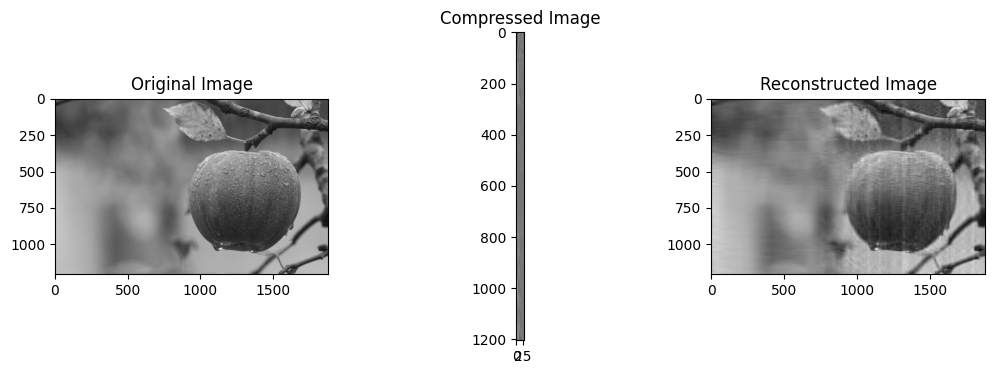

In [55]:
# Plot the original, compressed, and reconstructed grayscale images
plt.figure(figsize = (12, 4))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(gray_image, cmap = 'gray')

plt.subplot(132)
plt.title('Compressed Image')
plt.imshow(Gray_CompressedImage, cmap = 'gray')

plt.subplot(133)
plt.title('Reconstructed Image')
plt.imshow(Gray_ReconstructedImage, cmap = 'gray')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-50.20218794971406..42.44174231087751].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1474339555936646..2.7034678598495].


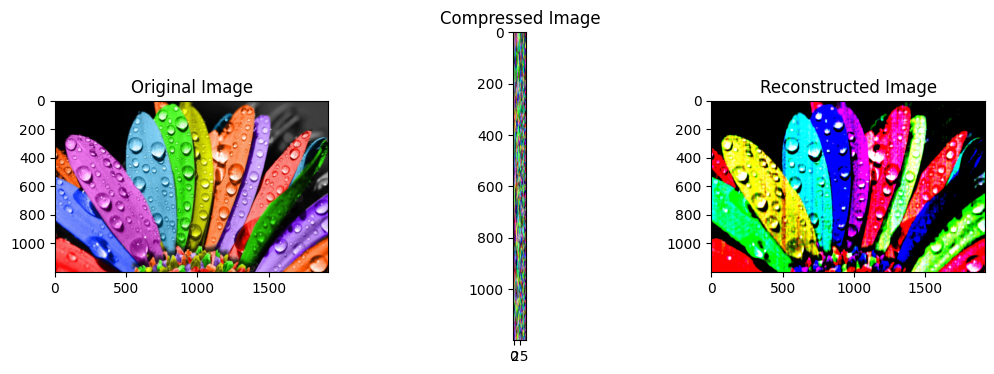

In [56]:
# Plot the original, compressed, and reconstructed coloured images
plt.figure(figsize = (12, 4))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(coloured_image)

plt.subplot(132)
plt.title('Compressed Image')
plt.imshow(Coloured_CompressedImage)

plt.subplot(133)
plt.imshow(Coloured_ReconstructedImage)
plt.title("Reconstructed Image")

plt.show()